<a href="https://colab.research.google.com/github/yebiFesseha/Excel-for-Excel-In-MachineLearning/blob/main/categorialpracticedata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import os
style.use('ggplot')
% matplotlib inline

In [ ]:
os.chdir("sample_data")

In [ ]:
df = pd.read_csv("Categorical_practicedata.csv", header=0, delimiter=',')
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [ ]:
print(df.columns)
print(df.shape)
print(df.info())

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
       'target'],
      dtype='object')
(300000, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      300000 non-null  int64 
 1   bin_0   300000 non-null  int64 
 2   bin_1   300000 non-null  int64 
 3   bin_2   300000 non-null  int64 
 4   bin_3   300000 non-null  object
 5   bin_4   300000 non-null  object
 6   nom_0   300000 non-null  object
 7   nom_1   300000 non-null  object
 8   nom_2   300000 non-null  object
 9   nom_3   300000 non-null  object
 10  nom_4   300000 non-null  object
 11  nom_5   300000 non-null  object
 12  nom_6   300000 non-null  object
 13  nom_7   300000 non-null  object
 14  nom_8  

In [ ]:
print(f"String type columns are:\n{df.select_dtypes(include='object').columns}\n")
print(f"non string type columns are:\n{df.select_dtypes(exclude='object').columns}\n")
print(f"integer type columns are:\n{df.select_dtypes(include='int').columns}\n")
print(f"float type columns are:\n{df.select_dtypes(include='float').columns}\n")

String type columns are:
Index(['bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5',
       'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_1', 'ord_2', 'ord_3', 'ord_4',
       'ord_5'],
      dtype='object')

non string type columns are:
Index(['id', 'bin_0', 'bin_1', 'bin_2', 'ord_0', 'day', 'month', 'target'], dtype='object')

integer type columns are:
Index(['id', 'bin_0', 'bin_1', 'bin_2', 'ord_0', 'day', 'month', 'target'], dtype='object')

float type columns are:
Index([], dtype='object')



In [ ]:
# drop unnecessary columns
df.drop(df.iloc[:, 11:16], axis=1, inplace=True)
df.head()


,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,1,Grandmaster,Freezing,a,R,qP,7,8,0


## Exploratory

In [ ]:
# no null values
[val for val in df.isna().sum().values if val>0]

[]

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,300000.0,149999.500000,86602.684716,0.0,74999.75,149999.5,224999.25,299999.0
bin_0,300000.0,0.127503,0.333537,0.0,0.00,0.0,0.00,1.0
bin_1,300000.0,0.256607,0.436761,0.0,0.00,0.0,1.00,1.0
bin_2,300000.0,0.383223,0.486173,0.0,0.00,0.0,1.00,1.0
day,300000.0,3.007817,1.817949,1.0,2.00,3.0,4.00,7.0
month,300000.0,5.771113,3.843519,1.0,2.00,4.0,9.00,12.0
target,300000.0,0.305880,0.460780,0.0,0.00,0.0,1.00,1.0


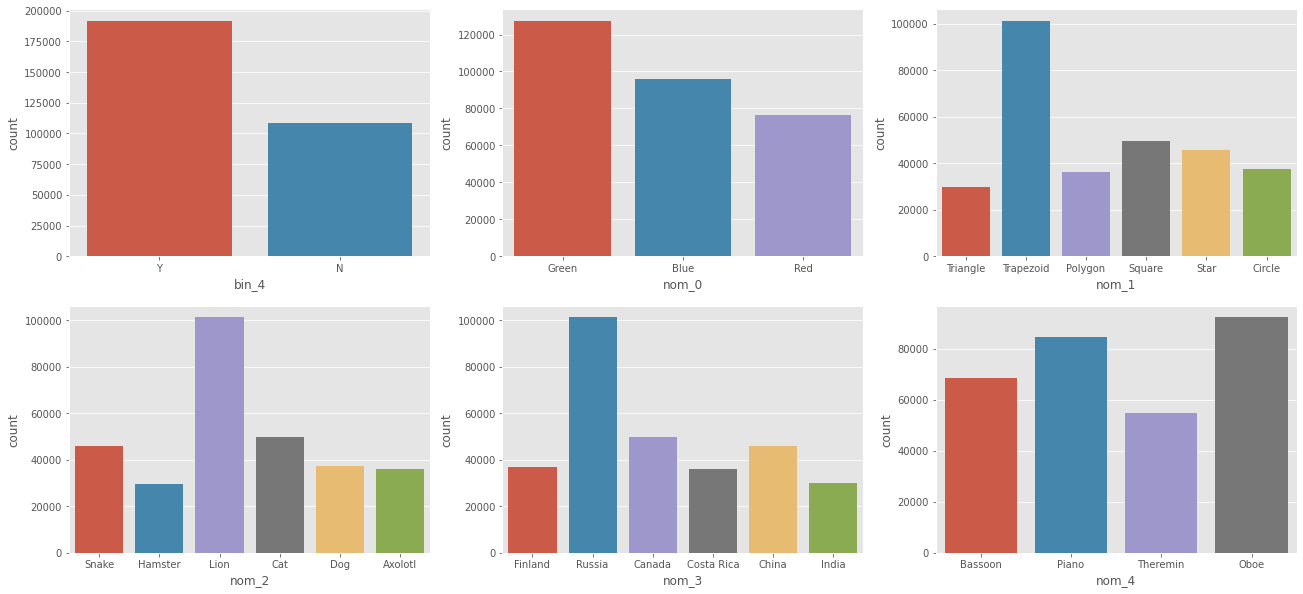

In [ ]:
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(22,10))
fig, axes = plt.subplots(2, 3, figsize=(22,10))
k=5
for i in range(2):
  for j in range(3):
    sns.countplot(x=df.iloc[:,k], ax=axes[i,j])
    k+=1
plt.show()

In [ ]:
df.loc[:, ['bin_0', 'bin_1','bin_2']].head()


,bin_0,bin_1,bin_2
0,0,0,0
1,0,1,0
2,0,0,0
3,0,1,0
4,0,0,0


## Modelling

In [ ]:
# To run it online and faster the data needs to be truncated to smaller size

df = df[:10000]
df.tail()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
9995,9995,0,1,0,F,Y,Blue,Trapezoid,Lion,Russia,Oboe,3,Novice,Freezing,f,U,LE,1,2,0
9996,9996,0,1,1,T,N,Green,Circle,Axolotl,Costa Rica,Bassoon,2,Contributor,Hot,l,V,lL,7,4,1
9997,9997,0,1,1,T,Y,Red,Polygon,Cat,India,Theremin,1,Novice,Boiling Hot,e,F,wu,1,8,1
9998,9998,0,0,1,T,Y,Red,Trapezoid,Lion,Canada,Piano,2,Grandmaster,Freezing,a,H,xy,4,4,0
9999,9999,0,0,0,T,Y,Red,Star,Lion,India,Oboe,1,Grandmaster,Freezing,d,L,dO,2,9,0


In [ ]:
# my features and Target 
X = df.drop(columns=['id', 'target'])
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7500, 18) (2500, 18)
(7500,) (2500,)


In [ ]:
X.columns

Index(['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2',
       'nom_3', 'nom_4', 'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5',
       'day', 'month'],
      dtype='object')

#### Column Transformers, Pipeline and Prediction

In [ ]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer

In [ ]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [ ]:
ct = ColumnTransformer(transformers=[
                                     ('step1', MinMaxScaler(), num_cols),
                                     ('step2', ohe, cat_cols)
], remainder='passthrough')

In [ ]:
ct

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('step1',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 Index(['bin_0', 'bin_1', 'bin_2', 'ord_0', 'day', 'month'], dtype='object')),
                                ('step2',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=False),
                                 Index(['bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'ord_1',
       'ord_2', 'ord_3', 'ord_4', 'ord_5'],
      dtype='object'))],
                  verbose=False)

In [ ]:
# pipelining
from sklearn.pipeline import Pipeline

In [ ]:
myPipe = Pipeline(steps=[
                ('ct', ct),
                ('clf', SVC())
])
print(myPipe)

Pipeline(memory=None,
         steps=[('ct',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('step1',
                                                  MinMaxScaler(copy=True,
                                                               feature_range=(0,
                                                                              1)),
                                                  Index(['bin_0', 'bin_1', 'bin_2', 'ord_0', 'day', 'month'], dtype='object')),
                                                 ('step2',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'...
                          

In [ ]:
myPipe.fit(X_train, y_train) 

Pipeline(memory=None,
         steps=[('ct',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('step1',
                                                  MinMaxScaler(copy=True,
                                                               feature_range=(0,
                                                                              1)),
                                                  Index(['bin_0', 'bin_1', 'bin_2', 'ord_0', 'day', 'month'], dtype='object')),
                                                 ('step2',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'...
                          

In [ ]:
# To get the newly created features by ohe
myPipe.named_steps['ct'].transformers_[1][1].get_feature_names()

array(['x0_F', 'x0_T', 'x1_N', 'x1_Y', 'x2_Blue', 'x2_Green', 'x2_Red',
       'x3_Circle', 'x3_Polygon', 'x3_Square', 'x3_Star', 'x3_Trapezoid',
       'x3_Triangle', 'x4_Axolotl', 'x4_Cat', 'x4_Dog', 'x4_Hamster',
       'x4_Lion', 'x4_Snake', 'x5_Canada', 'x5_China', 'x5_Costa Rica',
       'x5_Finland', 'x5_India', 'x5_Russia', 'x6_Bassoon', 'x6_Oboe',
       'x6_Piano', 'x6_Theremin', 'x7_Contributor', 'x7_Expert',
       'x7_Grandmaster', 'x7_Master', 'x7_Novice', 'x8_Boiling Hot',
       'x8_Cold', 'x8_Freezing', 'x8_Hot', 'x8_Lava Hot', 'x8_Warm',
       'x9_a', 'x9_b', 'x9_c', 'x9_d', 'x9_e', 'x9_f', 'x9_g', 'x9_h',
       'x9_i', 'x9_j', 'x9_k', 'x9_l', 'x9_m', 'x9_n', 'x9_o', 'x10_A',
       'x10_B', 'x10_C', 'x10_D', 'x10_E', 'x10_F', 'x10_G', 'x10_H',
       'x10_I', 'x10_J', 'x10_K', 'x10_L', 'x10_M', 'x10_N', 'x10_O',
       'x10_P', 'x10_Q', 'x10_R', 'x10_S', 'x10_T', 'x10_U', 'x10_V',
       'x10_W', 'x10_X', 'x10_Y', 'x10_Z', 'x11_AP', 'x11_Ai', 'x11_Aj',
       'x11_

In [ ]:
y_pred = myPipe.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(f"The accuracy_score using SVC is {100*accuracy_score(y_test, y_pred)}%")

The accuracy_score using SVC is 71.88%


In [ ]:
myPipe = Pipeline(steps=[
                ('ct', ct),
                ('clf', LogisticRegression())
])
myPipe.fit(X_train, y_train) 
y_pred = myPipe.predict(X_test)
print(f"The accuracy_score using Logistic Regrssion is {100*accuracy_score(y_test, y_pred)}%")

The accuracy_score using Logistic Regrssion is 73.48%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
myPipe = Pipeline(steps=[
                ('ct', ct),
                ('clf', DecisionTreeClassifier())
])
myPipe.fit(X_train, y_train) 
y_pred = myPipe.predict(X_test)
print(f"The accuracy_score using Decision Tree Classifier is {100*accuracy_score(y_test, y_pred)}%")

The accuracy_score using Decision Tree Classifier is 63.68000000000001%
